In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import notebook
import math

# Sigmoid Function Plotting

$S_{w,b}(x)=\frac{1}{1+e^{-(wx+b)}}$

In [2]:
def sigmoid(x,w,b):
    return 1/(1+np.exp(-(w*x+b)))

In [3]:
sigmoid(1,0.5,0)

0.6224593312018546

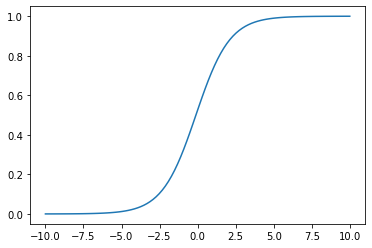

In [4]:
w = 0.9  
b = 0.1
X = np.linspace(-10,10,100)
Y = sigmoid(X,w,b)
plt.plot(X,Y)
plt.show()

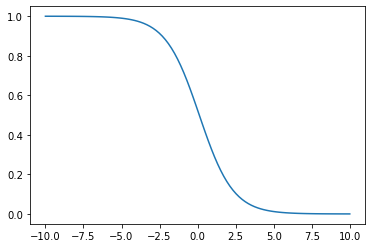

In [5]:
w = -0.9  
b = 0.1
X = np.linspace(-10,10,100)
Y = sigmoid(X,w,b)
plt.plot(X,Y)
plt.show()

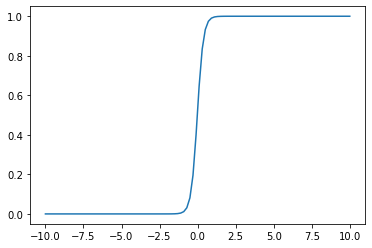

In [6]:
w = 5  
b = 0.1
X = np.linspace(-10,10,100)
Y = sigmoid(X,w,b)
plt.plot(X,Y)
plt.show()

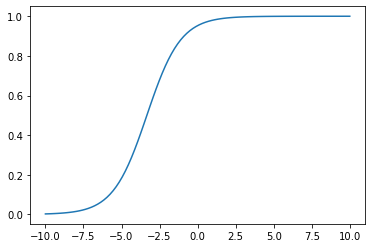

In [7]:
w = 0.9  
b = 3
X = np.linspace(-10,10,100)
Y = sigmoid(X,w,b)
plt.plot(X,Y)
plt.show()

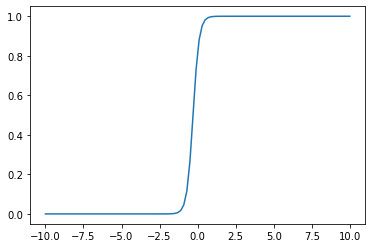

In [8]:
w = 5 
b = 1.5
X = np.linspace(-10,10,100)
Y = sigmoid(X,w,b)
plt.plot(X,Y)
plt.show()

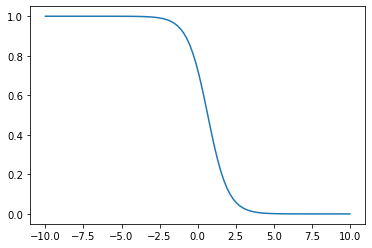

In [9]:
w = -1.5  
b = 1
X = np.linspace(-10,10,100)
Y = sigmoid(X,w,b)
plt.plot(X,Y)
plt.show()

# Sigmoid function for more than one feature

$S_{w_1,w_2,b}(x_1,x_2) = \frac{1}{1+e^{-1(w_1x_1+w_2x_2+b)}}$

In [10]:
def sigmoid_2d(x1,x2,w1,w2,b):
    return 1/(1+np.exp(-(w1*x1+w2*x2+b)))

In [11]:
sigmoid_2d(1,0,0.5,0,0)

0.6224593312018546

In [12]:
from mpl_toolkits import mplot3d

In [13]:
x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,100)

In [14]:
X1,X2 = np.meshgrid(x1,x2)

In [15]:
print(x1.shape,x2.shape,X1.shape,X2.shape)

(100,) (100,) (100, 100) (100, 100)


In [16]:
w1 = 0.5
w2 = 2
b = 0
Y = sigmoid_2d(X1,X2,w1,w2,b)

Text(0.5, 0, 'y')

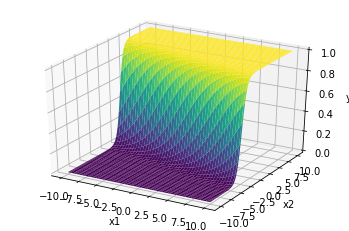

In [17]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X1,X2,Y,cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')


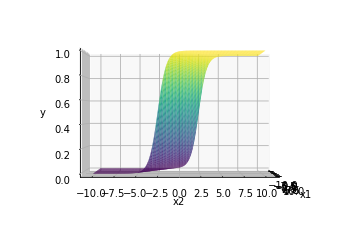

In [18]:
ax.view_init(0,0)
fig

In [19]:
w1 = 0.5
w2 = 0.5
b = 0
Y = sigmoid_2d(X1,X2,w1,w2,b)

Text(0.5, 0, 'y')

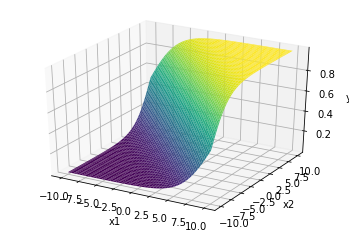

In [20]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X1,X2,Y,cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

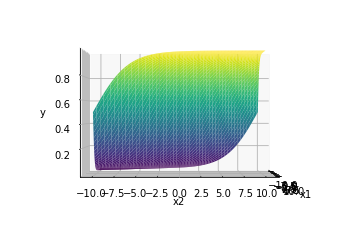

In [21]:
ax.view_init(0,0)
fig

In [22]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

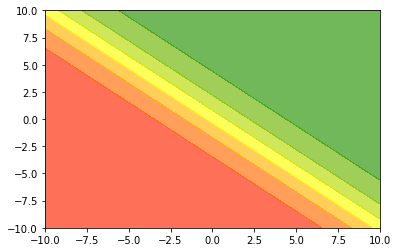

In [23]:
plt.contourf(X1,X2,Y,cmap=my_cmap,alpha=0.65)
plt.show()

# Compute Loss for a Given Dataset

In [24]:
import random

In [25]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25)*20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

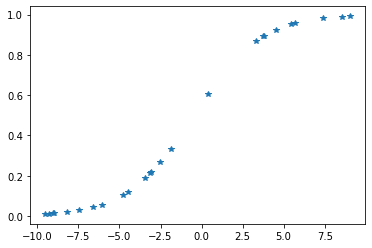

In [26]:
plt.plot(X,Y,'*')
plt.show()

In [27]:
def calculate_loss(X,Y,w_est,b_est):
    loss = 0
    for x,y in zip(X,Y):
        loss += (y- sigmoid(x,w_est,b_est))**2
    return loss

In [28]:
W = np.linspace(0,2,101)
B = np.linspace(-1,1,101)
WW, BB = np.meshgrid(W,B)

Loss = np.zeros(WW.shape)

In [29]:
WW.shape

(101, 101)

In [30]:
for i in range(WW.shape[0]):
    for j in range(WW.shape[1]):
        Loss[i,j] = calculate_loss(X,Y,WW[i,j], BB[i,j]) 

Text(0.5, 0, 'Loss')

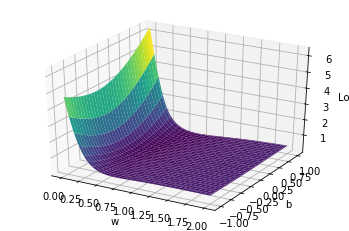

In [31]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW,BB,Loss,cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

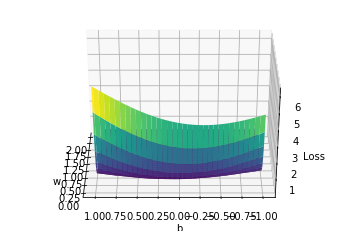

In [32]:
ax.view_init(30,180)
fig

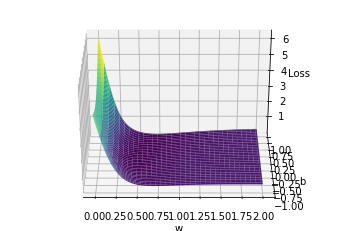

In [33]:
ax.view_init(30,270)
fig

In [34]:
ij = np.argmin(Loss)
i  = (int)(np.floor(ij/Loss.shape[1]))
j = (int)(ij - i*Loss.shape[1])

In [35]:
print(i,j)

62 25


In [36]:
print(WW[i,j],BB[i,j])

0.5 0.24


# Sigmoid Neuron Class


In [37]:
class SigmoidNeuron:

    def __init__(self):
        self.w = None
        self.b = None
    
    def perceptron(self, x):
        return np.dot(x, self.w.T) + self.b
    
    def sigmoid(self,x):
        return 1.0/(1.0 + np.exp(-x))

    def grad_w(self,x,y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred-y)*y_pred*(1-y_pred)*x
    
    def grad_b(self,x,y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred-y)*y_pred*(1-y_pred)

    
    def fit(self, X, Y, epoch=1, learning_rate = 1,intialise = True, display_loss = False):
        #intialise w,b
        if intialise:
            self.w = np.random.randn(1,X.shape[1])
            self.b = 0

        if display_loss:
            loss = []
        for i in notebook.tqdm(range(epoch), total = epoch, unit="epoch"):
            dw = 0
            db = 0
           # print("Epoch: {}".format(i))
            for x,y in zip(X,Y):
                dw += self.grad_w(x,y)
                db += self.grad_b(x,y)
            self.w -= learning_rate * dw
            self.b -= learning_rate * db

            if display_loss:
                Y_pred = self.sigmoid(self.perceptron(X))
                loss.append(mean_squared_error(Y_pred, Y))
        if display_loss:
            plt.plot(loss)
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.show()

    def predict(self,X):
        Y_pred = []
        for x in X:
            y_pred = self.sigmoid(self.perceptron(x))
            Y_pred.append(y_pred)
        return np.array(Y_pred)

# Fit for toy data

In [38]:
X = np.asarray([[2.5,2.5], [4,-1],[1,-4],[-3,1.25],[-2,-4],[1,5]])
Y = [1,1,1,0,0,0]

In [39]:
sn = SigmoidNeuron()
sn.fit(X,Y,1,0.25,True)

In [40]:
def plot_sn(X,Y,sn,ax):
    X1 = np.linspace(-10,10,100)
    X2 = np.linspace(-10,10,100)
    XX1, XX2 = np.meshgrid(X1,X2)
    YY = np.zeros(XX1.shape)
    for i in range(X2.size):
        for j in range(X1.size):
            val = np.asarray([X1[j], X2[i]])
            YY[i,j] = sn.sigmoid(sn.perceptron(val))
    ax.contourf(XX1,XX2,YY,cmap=my_cmap, alpha = 0.7)
    ax.scatter(X[:,0],X[:,1],c=Y,cmap=my_cmap)
    plt.plot()


[[ 0.6419863  -0.64800989]] [0.01686893]



[[ 1.11189442 -0.00623359]] [0.00755638]



[[ 1.05871856 -0.67737454]] [-0.07530951]



[[ 1.41128096 -0.11388045]] [-0.14861649]



[[ 1.32063724 -0.74922948]] [-0.25422354]



[[ 1.61263321 -0.26124772]] [-0.32783753]



[[ 1.53178705 -0.75811176]] [-0.42366473]



[[ 1.73005223 -0.42559156]] [-0.47887173]



[[ 1.70301898 -0.64363391]] [-0.5299571]



[[ 1.76771159 -0.56520117]] [-0.55711616]


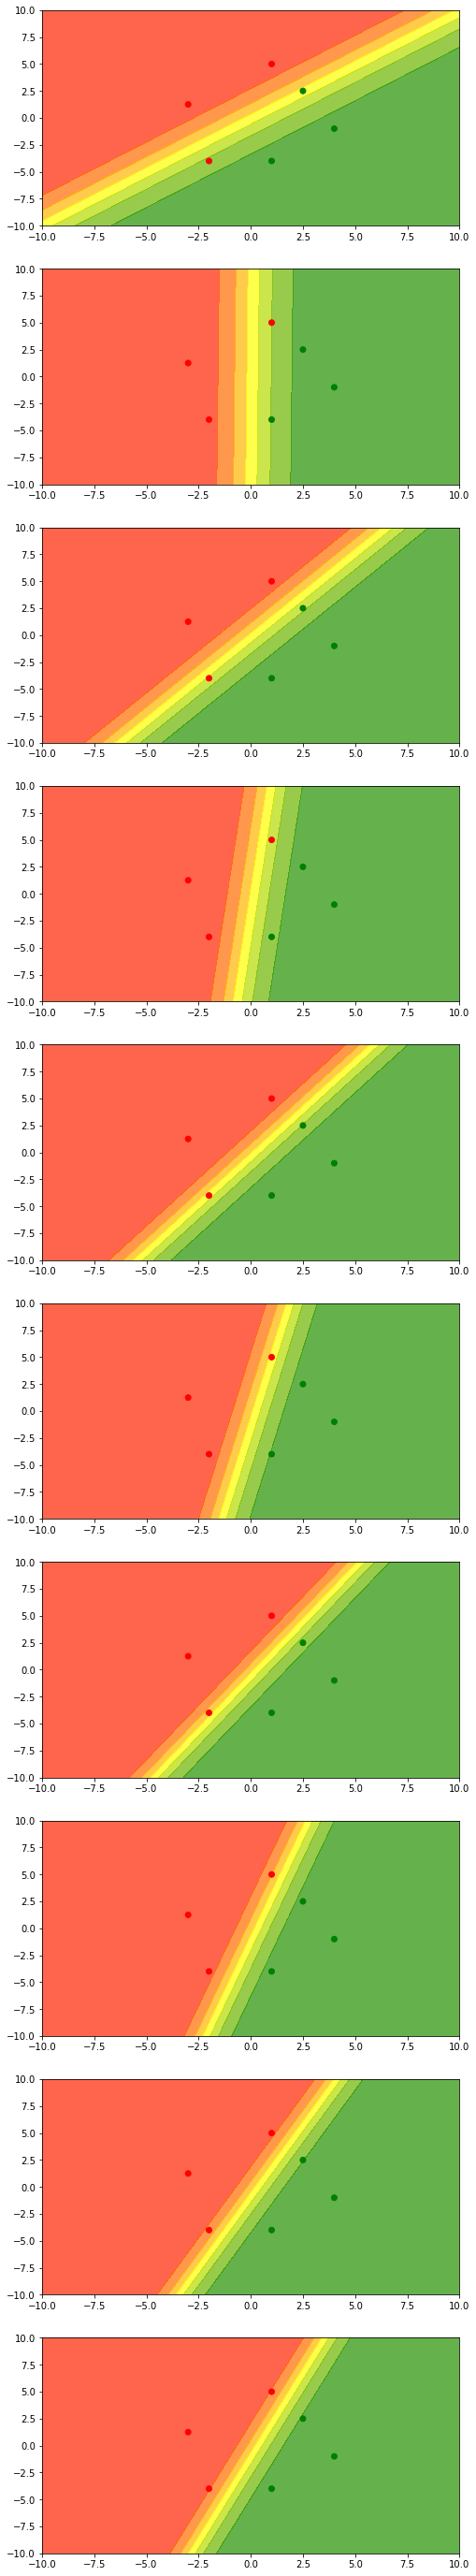

In [41]:

sn.fit(X,Y,1,0.25,True)
N =10
plt.figure(figsize=(8,N*5))
for i in range(N):
    print(sn.w,sn.b)
    ax = plt.subplot(N,1,i+1)
    plot_sn(X,Y,sn,ax)
    sn.fit(X,Y,1,0.8,False)


# Load Data

In [42]:
import pandas as pd

In [43]:
data = pd.read_csv('mobile_cleaned.csv')

In [44]:
data.head()

,PhoneId,Pixel Density,Weight,RAM,Resolution,Screen to Body Ratio (calculated),Screen Size,Internal Memory,Capacity,Height,...,Brand_Yu,Brand_iVooMi,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,182,4,20,80.68,6.26,64,4000,157.9,...,0,0,0,0,1,0,0,0,1,4.5
1,1,271,168,3,8,80.85,6.20,32,4230,156.2,...,0,0,0,0,1,0,0,0,1,4.5
2,2,409,168,3,25,83.68,6.30,32,3500,157.0,...,0,0,0,0,1,0,0,0,1,4.4
3,4,411,169,4,24,74.78,6.00,64,3300,159.8,...,0,0,0,0,1,0,0,0,1,4.3
4,5,396,175,4,16,84.23,6.50,64,3750,160.4,...,0,0,0,0,1,0,0,0,1,4.4


In [45]:
data.shape

(341, 88)

In [46]:
X = data.drop('Rating', axis=1)
Y = data['Rating']

In [47]:
threshold = 4.2
data['class']= (data["Rating"] >= threshold).astype(np.int)

In [48]:
data['class'].value_counts()

0    182
1    159
Name: class, dtype: int64

In [49]:
Y_binarised = data['class'].values

# Standardisation 

In [50]:
R = np.random.random([100,1])

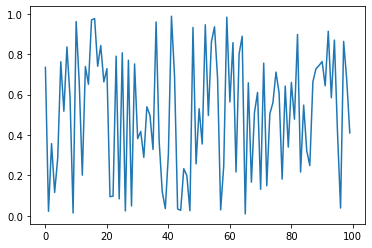

In [51]:
plt.plot(R)
plt.show()

In [52]:
np.mean(R)

0.510611925432086

In [53]:
np.std(R)

0.30153445779481625

In [54]:
scaler = StandardScaler()

In [55]:
scaler.fit(R)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [56]:
scaler.mean_

array([0.51061193])

In [57]:
R_new = scaler.transform(R)

In [58]:
np.mean(R_new)

-7.216449660063518e-18

In [59]:
np.std(R_new)

0.9999999999999998

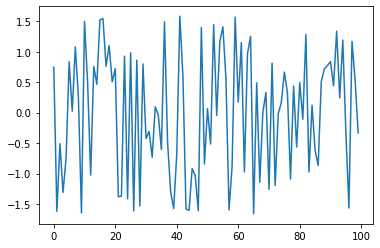

In [60]:
plt.plot(R_new)

In [61]:
Y_binarised

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 1, stratify=Y_binarised)

In [63]:
print(X_train.shape,X_test.shape)

(255, 87) (86, 87)


In [64]:
scaler = StandardScaler()

In [65]:
X_scaled_train = scaler.fit_transform(X_train)

In [66]:
X_scaled_test = scaler.transform(X_test)

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
minmax_scaler = MinMaxScaler()

In [69]:
Y_train = Y_train.values

In [70]:
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1,1))

In [71]:
np.min(Y_scaled_train)

0.0

In [72]:
Y_test = Y_test.values

In [73]:
Y_scaled_test = minmax_scaler.transform(Y_test.reshape(-1,1))

In [74]:
scaled_threshold = list(minmax_scaler.transform(np.array([threshold]).reshape(-1,1)))[0][0]

In [75]:
print(threshold,scaled_threshold)

4.2 0.6800000000000002


In [76]:
Y_binarised_train = (Y_scaled_train > scaled_threshold).astype('int').ravel()

In [77]:
Y_binarised_test = (Y_scaled_test > scaled_threshold).astype('int').ravel()

In [78]:
Y_binarised_train

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1])

# Train on Real Data

In [79]:
sn = SigmoidNeuron()

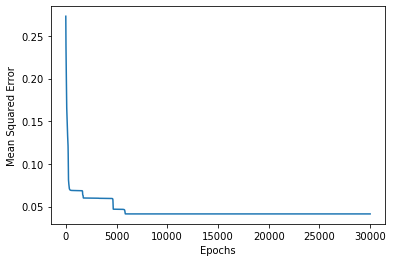

In [80]:
sn.fit(X_scaled_train,Y_scaled_train,epoch=30000,learning_rate=0.01,display_loss=True)

In [81]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

In [82]:
Y_pred_binarised_train = (Y_pred_train > scaled_threshold).astype("int").ravel()

In [83]:
Y_pred_binarised_test = (Y_pred_test > scaled_threshold).astype("int").ravel()

In [84]:
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_binarised_train)
accuracy_test = accuracy_score(Y_pred_binarised_test, Y_binarised_test)

In [85]:
print(accuracy_train,accuracy_test)

0.8196078431372549 0.7558139534883721
